<center><h1><b>STEPS FOR MACHINE LEARNING "MLOps"</b></h1></center>

### In this file , I will be implementing basic Machine Learning codes for better understanding of the MLOps workflow.

# **Machine learning pipeline:**

Machine Learning pipline is a technical infrastructure used to automate and manage ML processes. The logic and number of tools behind the pipeline vary depending on the ML need.The pipeline will provides means for training,orchestrating and managing models on production.

Every machine learning software needs to manage three main aspects:


*   **DATA - DATA ENGINEERING PIPELINES** 
*   **MODEL - MACHINE LEARNING PIPELINES**
*   **CODE - DEPLOYMENT PIPELINES** 


# **STEP 1: DATA (DATA ENGINEERING PIPELINES)**

>**DATA GATHERING :** Collecting the required data is the first step. It is also defined as "the problem statement" by ***François Chollet***.

In [1]:
# Importing some libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
# Reading the dataset 
dataset = pd.read_csv('winequality-red.csv')
# To display the first 5 entries
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


>**DATA EXPLORATION :** The collected data is first explored by obtaining information about the content and structure of the data like data types, missing values,number of records, etc.... This process is like a error detection function, which scan the dataset to spot some errors.


In [3]:
# Information regarding all the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


>**DATA WRANGLING :** The data is formatted,re-structured, cleaned, labeled, and enriched so that data quality for future models is acceptable.

In [4]:
# Neglecting the Null values/columns
df = dataset.dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


>**DATA SPLITING :** The data is split into three as: training, validation and testing dataset.

<font size = 4px><i> A validation dataset compares performance of the different algorithms with different hyperparameters and decides which one to choose. Since I am using only one algorithm, validation is not performed here.</i></font><br>

In [5]:
#Assigning columns to x and y
x = df[[ 'free sulfur dioxide']]  #Independent variables
y = df['quality']  #Dependent variable
print(x)
print(y)

      free sulfur dioxide
0                    11.0
1                    25.0
2                    15.0
3                    17.0
4                    11.0
...                   ...
1594                 32.0
1595                 39.0
1596                 29.0
1597                 32.0
1598                 18.0

[1599 rows x 1 columns]
0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


# **STEP 2: MODEL (MACHINE LEARNING PIPELINES)**

>**ALGORITHM CHOICE:** Choosing an algorithm is one of the initial decisions in ML. In any model there is a mathematical algorithm that defines how a model will find patterns in the data.

<font size = 4px><i> Here, we are finding the <b>Linear regression</b> between two variables.</i></font><br>
<br>
<font size = 4px><b> ALGORITHM USED : </b><i>Linear regression</i></font>


>**MODEL TRAINING:** Data scientists fit the model with historic data to train it such that is can make predictions with new data.

In [6]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print("Training data is:")
print (x_train)
print(y_train)

Training data is:
      free sulfur dioxide
92                   19.0
1017                 36.0
1447                 22.0
838                   9.0
40                   12.0
...                   ...
763                   5.0
835                  27.0
1216                 10.0
559                   6.0
684                  35.0

[1119 rows x 1 columns]
92      5
1017    6
1447    5
838     7
40      5
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1119, dtype: int64


>**TESTING AND VALIDATION:** The trained model is now used on testing and validated data to compare the results so that the model can be tuned and modified to be applied on different datas. 

In [7]:
print("Testing data is:")
print (x_test)
print (y_test)

Testing data is:
      free sulfur dioxide
1109                 27.0
1032                  5.0
1002                 13.0
487                   5.0
979                   3.0
...                   ...
801                   8.0
61                   20.0
431                  21.0
1210                  8.0
713                  10.0

[480 rows x 1 columns]
1109    6
1032    5
1002    7
487     6
979     5
       ..
801     5
61      5
431     5
1210    6
713     5
Name: quality, Length: 480, dtype: int64


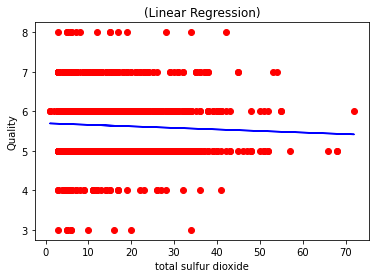

In [8]:
#Building the model by fitting the training data into Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Visualizing the Linear Regression result
def viz_linear():
    plt.scatter(x, y, color='red')
    plt.plot(x, lin_reg.predict(x), color='blue')
    plt.title('(Linear Regression)')
    plt.xlabel('total sulfur dioxide')
    plt.ylabel('Quality')
    plt.show()
    return
viz_linear()

>**MODEL PACKAGING** : The final model is exported into a specific format so that it can be exported by a business application.

# **STEP 3: CODE (DEPLOYMENT PIPELINES)**

<font size = 4px><i> The following steps are explained on the basis when MICROSOFT AZURE is used.</i></font><br>

>**MODEL SERVING:** It is the way in which a ML model is integrated into a software system.

>**MODEL PERFORMANCE MONITORING:** The performance of the model is monitored so that we may notice when it starts deviating from previous model performance. This serves as a signal for model re-training.
* **MODEL RETRAINING:** The models which are trained on historic data becomes outdated overtime due to which its accuracy starts to decrease. When the accuracy starts to decrease model re-training needs to be done with new sets of data.
* **MODEL EVALUATION:** The re-trained model is evaluated against the given metric or the existing old model before confirming that the model is readdy for prodection.

WORKFLOW PROCESS 1:

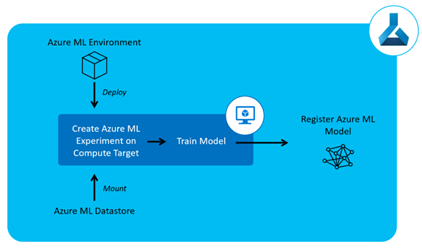

WORKFLOW PROCESS 2:

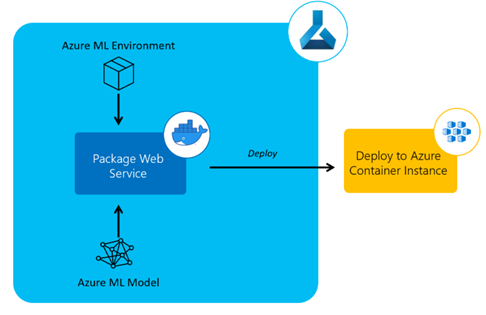

>**MODEL PERFORMANCE LOGGING:** Every inference request gets logged in as a record.

# **LEVELS IN MLOPS:**

**There are 3 levels of MLOps:**

*   LEVEL 1: Manual process
*   LEVEL 2: ML pipeline automation
*   LEVEL 3: CI/CD pipeline automation


# **LEVEL 1: MANUAL PROCESS**

- Each and every step of the ML model is executed manually.

- A new version of the model is deployed only couple of times a year.

- There is no continuous integration or deployment.

- The model predictions and actions are not logged in nor recorded.

# **LEVEL 2: ML PIPELINE AUTOMATION**

- Continuous training and delivery of the model is done by automating the ML pipeline.

- All the processes of ML models are done automatically.

- New data is expected by the pipeline so as to produce a new version model.

- Each execution of the ML pipeline is recorded so as to help with debug errors and anomalies.

# **LEVEL 3: CI/CD PIPELINE AUTOMATION**

- Continuous training and delivery helps in deployment of the pipeline with new implementation of the model.

- A robust and automated CI/CD system is needed for a reliable and accurate updation of the pipeline in production.

- A trained model is pushed to the model registry based on a schedule

- The statistics of the model performance based on live data is collected.

- Until a new iteration of the experiment is started the data analysis part is a manual process for the data scientists.